Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data handling

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

df = pd.read_csv(csv_file_path)

total_rows = len(df)

print(f"Total number of items (rows) in '{csv_file_path}': {total_rows}")


Total number of items (rows) in '/content/drive/MyDrive/cleaned_labels.csv': 8408


In [ ]:
import pandas as pd

csv_files = [
    '/content/drive/MyDrive/cutmixed_images/labelsX.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsY.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsZ.csv',
   '/content/drive/MyDrive/cleaned_labels.csv'
]

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)

    if 'image' in df.columns and 'level' in df.columns:
        df = df.rename(columns={'image': 'filename', 'level': 'label'})
    elif 'filename' in df.columns and 'labels' in df.columns:
        df = df.rename(columns={'labels': 'label'})

    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/merged_labels.csv', index=False)

print("CSV files standardized and merged successfully.")


CSV files standardized and merged successfully.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


In [ ]:
class_counts = merged_df['label'].value_counts()

print("Number of unique classes:", len(class_counts))
print("\nClass distribution:\n", class_counts)

Number of unique classes: 5

Class distribution:
 label
0    6150
2    1283
4     800
3     800
1     800
Name: count, dtype: int64


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


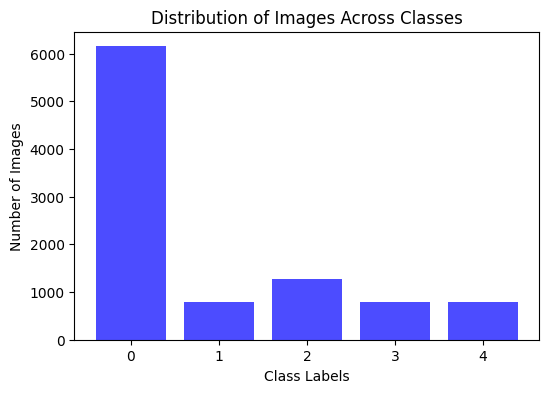

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


class_counts = data['label'].value_counts().sort_index()  # Get counts and sort by class labels


plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')


plt.xticks(class_counts.index)

plt.show()


In [ ]:
print("Number of images in each class:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")

Number of images in each class:
Class 0: 6150 images
Class 1: 800 images
Class 2: 1283 images
Class 3: 800 images
Class 4: 800 images


Class distribution after undersampling: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}
Resampled class counts: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}


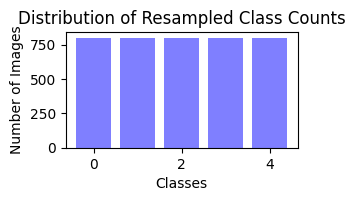

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = data['filename']
y = data['label']

X_array = X.values.reshape(-1, 1)
y_array = y.values

class_counts = {0: 6150, 1: 800, 2: 1283, 3: 800, 4: 800}
target_count = min(class_counts.values())

undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_under, y_under = undersampler.fit_resample(X_array, y_array)

print("Class distribution after undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

oversampler = RandomOverSampler(sampling_strategy={label: target_count for label in np.unique(y_under)})
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)

plt.figure(figsize=(3, 1.5))
plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='blue', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Resampled Class Counts')
plt.show()


In [ ]:
new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)

In [ ]:
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
resampled_data = {'filename': new_X,
        'label': y_resampled}

balanced_data = pd.DataFrame(resampled_data)


balanced_data.sample(10)

,filename,label
3684,cutmixed_4_63.jpeg,4
1264,cutmixed_76.jpeg,1
1868,19254_left,2
3229,cutmixed_4_453.jpeg,4
2382,14078_left,2
3797,18059_right,4
3689,cutmixed_4_466.jpeg,4
2442,12881_right,3
2841,17992_right,3
1880,1544_left,2


In [ ]:
print(balanced_data.value_counts().sum())
print(balanced_data['label'].unique())
print(balanced_data['label'].value_counts().unique())

4000
[0 1 2 3 4]
[800]


In [ ]:
balanced_data['filename'] = balanced_data['filename']+'.jpeg'
balanced_data['label'] = balanced_data['label'].astype(str)
balanced_data.head()

,filename,label
0,10014_left.jpeg,0
1,14595_left.jpeg,0
2,10050_right.jpeg,0
3,1886_right.jpeg,0
4,17279_left.jpeg,0


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

Ben Graham's preprocessing

In [ ]:
import cv2
import numpy as np
import os

def scale_radius(img, scale):
    """
    Scales the image to a specified radius.
    """
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

def subtract_local_average_color(img):
    """
    Subtracts the local average color.
    """
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0),  10), -4, 128)
    return img

def clip_image(img, target_size=(224, 224)):
    """
    Clips the image to 90% size to remove boundary effects, and optionally applies resizing and normalization.
    """
    img_a = scale_radius(img, 300)
    img = subtract_local_average_color(img_a)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = int(300 * 0.9)
    cv2.circle(mask, center, radius, 255, -1)
    img_masked = cv2.bitwise_and(img,img, mask=mask)

    # # Resize the image
    img_resized = cv2.resize(img_masked, target_size)


    return img_resized


In [ ]:
import os
import pandas as pd

cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

print("Total cutmixed_ images in train:", len(cutmixed_train))
print("Total cutmixed_ images in val:", len(cutmixed_val))

cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))

missing_train_files = cutmixed_train[~cutmixed_train['exists']]
missing_val_files = cutmixed_val[~cutmixed_val['exists']]

print("Missing train files:", missing_train_files['filename'].tolist())
print("Missing val files:", missing_val_files['filename'].tolist())

Total cutmixed_ images in train: 1155
Total cutmixed_ images in val: 270
Missing train files: ['cutmixed_class3_373.jpeg.jpeg', 'cutmixed_4_480.jpeg.jpeg', 'cutmixed_4_337.jpeg.jpeg', 'cutmixed_class3_103.jpeg.jpeg', 'cutmixed_4_80.jpeg.jpeg', 'cutmixed_class3_393.jpeg.jpeg', 'cutmixed_4_303.jpeg.jpeg', 'cutmixed_class3_471.jpeg.jpeg', 'cutmixed_class3_553.jpeg.jpeg', 'cutmixed_class3_529.jpeg.jpeg', 'cutmixed_185.jpeg.jpeg', 'cutmixed_8.jpeg.jpeg', 'cutmixed_4_86.jpeg.jpeg', 'cutmixed_4_127.jpeg.jpeg', 'cutmixed_4_97.jpeg.jpeg', 'cutmixed_4_407.jpeg.jpeg', 'cutmixed_4_197.jpeg.jpeg', 'cutmixed_0.jpeg.jpeg', 'cutmixed_4_586.jpeg.jpeg', 'cutmixed_4_499.jpeg.jpeg', 'cutmixed_95.jpeg.jpeg', 'cutmixed_4_254.jpeg.jpeg', 'cutmixed_154.jpeg.jpeg', 'cutmixed_4_6.jpeg.jpeg', 'cutmixed_class3_545.jpeg.jpeg', 'cutmixed_4_318.jpeg.jpeg', 'cutmixed_class3_316.jpeg.jpeg', 'cutmixed_class3_23.jpeg.jpeg', 'cutmixed_68.jpeg.jpeg', 'cutmixed_4_36.jpeg.jpeg', 'cutmixed_4_488.jpeg.jpeg', 'cutmixed_124.jpe

<ipython-input-21-77bcb2fc647d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
<ipython-input-21-77bcb2fc647d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))


In [ ]:
cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


<ipython-input-22-6262e7331acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
<ipython-input-22-6262e7331acc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

def check_filenames(df, directory):
    missing_files = [f for f in df['filename'] if not os.path.exists(os.path.join(directory, f))]
    if missing_files:
        print(f"Missing files: {len(missing_files)}")
        print("Sample missing files:", missing_files[:5])
    return len(missing_files) == 0

image_directory = '/content/drive/MyDrive/train_dr'

if not check_filenames(train, image_directory) or not check_filenames(val, image_directory):
    print("Some image files are missing. Please verify the paths and filenames.")
else:
    print("All files are present.")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Missing files: 1155
Sample missing files: ['cutmixed_class3_373.jpeg.jpeg', 'cutmixed_4_480.jpeg.jpeg', 'cutmixed_4_337.jpeg.jpeg', 'cutmixed_class3_103.jpeg.jpeg', 'cutmixed_4_80.jpeg.jpeg']
Some image files are missing. Please verify the paths and filenames.
Found 2045 validated image filenames belonging to 5 classes.
Found 530 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1155 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 270 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Correct filenames by removing extra extensions
train['filename'] = train['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))
val['filename'] = val['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))

# Re-check if files exist after correcting filenames
print("Checking corrected filenames...")
missing_train_files = [f for f in train['filename'] if not os.path.exists(os.path.join(image_directory, f))]
missing_val_files = [f for f in val['filename'] if not os.path.exists(os.path.join(image_directory, f))]

print(f"Missing files in train after correction: {len(missing_train_files)}")
print(f"Missing files in val after correction: {len(missing_val_files)}")

if missing_train_files:
    print("Sample missing train files:", missing_train_files[:5])
if missing_val_files:
    print("Sample missing val files:", missing_val_files[:5])


Checking corrected filenames...
Missing files in train after correction: 0
Missing files in val after correction: 0


In [ ]:
# Filter cutmixed_ images
cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

# Print counts to verify
print(f"Total cutmixed_ images in train: {len(cutmixed_train)}")
print(f"Total cutmixed_ images in val: {len(cutmixed_val)}")

# Combine the filtered cutmixed_ images with the original DataFrames
train_combined = pd.concat([train, cutmixed_train]).drop_duplicates(subset='filename')
val_combined = pd.concat([val, cutmixed_val]).drop_duplicates(subset='filename')

# Print counts to verify combined DataFrames
print(f"Total images in combined train DataFrame: {len(train_combined)}")
print(f"Total images in combined val DataFrame: {len(val_combined)}")

Total cutmixed_ images in train: 1155
Total cutmixed_ images in val: 270
Total images in combined train DataFrame: 3200
Total images in combined val DataFrame: 800


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


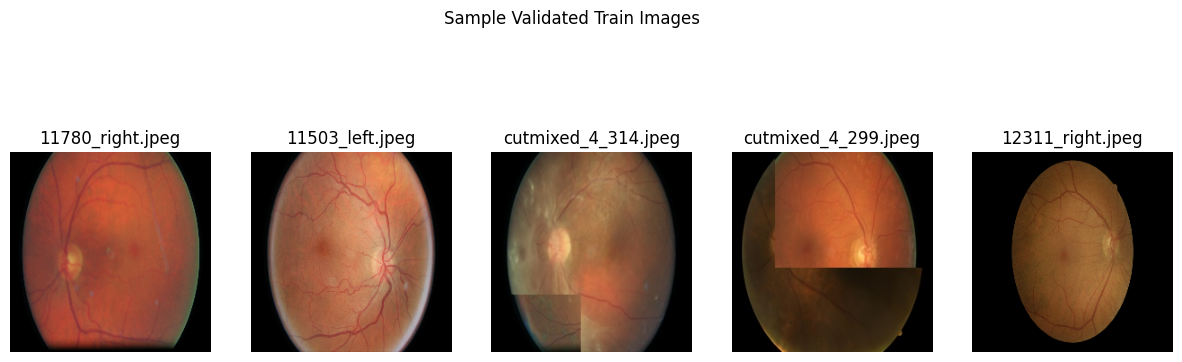

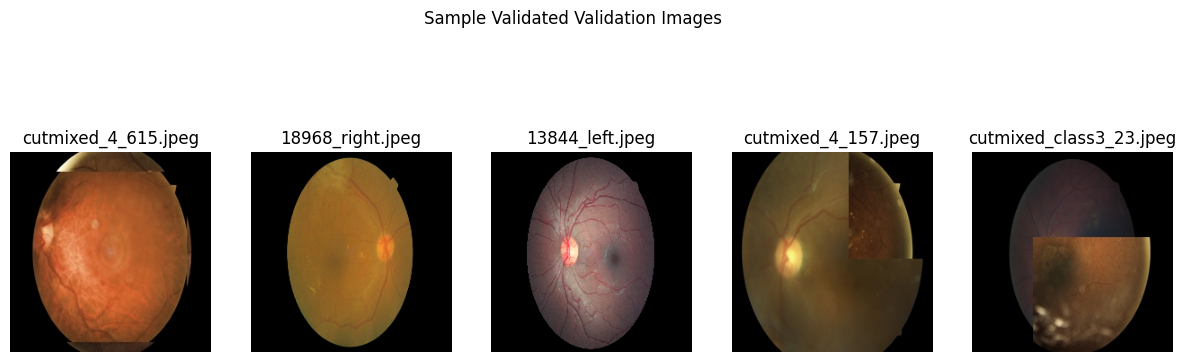

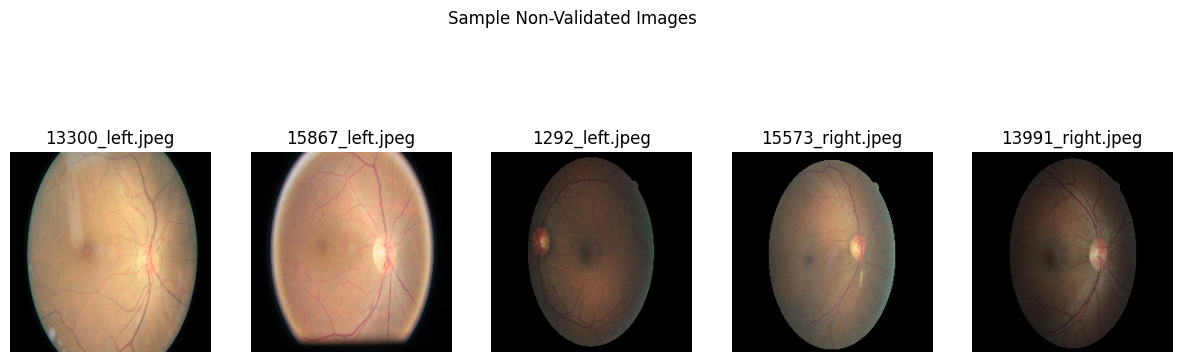

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/drive/MyDrive/train_dr'

validated_train_filenames = train_generator.filenames
validated_val_filenames = val_generator.filenames

all_filenames = os.listdir(image_dir)

non_validated_filenames = [f for f in all_filenames if f not in validated_train_filenames and f not in validated_val_filenames]

def display_sample_images(image_list, title, image_dir, sample_size=5):
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random.sample(image_list, sample_size)):
        img = load_img(os.path.join(image_dir, filename), target_size=(224, 224))
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(validated_train_filenames, "Sample Validated Train Images", image_dir)
display_sample_images(validated_val_filenames, "Sample Validated Validation Images", image_dir)

display_sample_images(non_validated_filenames, "Sample Non-Validated Images", image_dir)


In [ ]:
import os

checkpoint_dir = '/content/drive/MyDrive/cut_ensemb-res/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

Custom Loss function combining Kappa loss and cross entropy loss

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.saving import register_keras_serializable

# Define Kappa Loss
@register_keras_serializable(package='Custom', name='kappa_loss')
def kappa_loss(y_true, y_pred):
    C = K.int_shape(y_pred)[-1]

    # Ensure y_true and y_pred are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute weights based on class labels for the disagreement
    weights = tf.expand_dims(tf.range(C, dtype=tf.float32), 0)
    weights = K.square(weights - K.transpose(weights)) / (C - 1) ** 2

    # Observed disagreement (o)
    observed = tf.matmul(y_true, y_pred, transpose_a=True)
    observed = K.sum(weights * observed)

    # Expected disagreement (e)
    hist_true = K.sum(y_true, axis=0)
    hist_pred = K.sum(y_pred, axis=0)
    expected = tf.matmul(tf.expand_dims(hist_true, axis=1), tf.expand_dims(hist_pred, axis=0))
    expected = K.sum(weights * expected) / K.sum(hist_true)

    # Calculate Kappa loss
    kappa_loss = 1 - (observed / (expected + K.epsilon()))

    return kappa_loss

# Define Combined Loss
@register_keras_serializable(package='Custom', name='combined_loss')
def combined_loss(kappa_weight=0.2):
    def loss(y_true, y_pred):
        # Calculate Categorical Cross-Entropy
        cross_entropy = tf.keras.losses.CategoricalCrossentropy()
        ce_loss = cross_entropy(y_true, y_pred)

        # Calculate Kappa Loss
        kappa = kappa_loss(y_true, y_pred)

        # Combine Losses
        return ce_loss + kappa_weight * kappa
    return loss


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Define Kappa Loss
def kappa_loss(y_true, y_pred):
    C = K.int_shape(y_pred)[-1]

    # Ensure y_true and y_pred are float32
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # Compute weights based on class labels for the disagreement
    weights = tf.expand_dims(tf.range(C, dtype=tf.float32), 0)
    weights = K.square(weights - K.transpose(weights)) / (C - 1) ** 2

    # Observed disagreement (o)
    observed = tf.matmul(y_true, y_pred, transpose_a=True)
    observed = K.sum(weights * observed)

    # Expected disagreement (e)
    hist_true = K.sum(y_true, axis=0)
    hist_pred = K.sum(y_pred, axis=0)
    expected = tf.matmul(tf.expand_dims(hist_true, axis=1), tf.expand_dims(hist_pred, axis=0))
    expected = K.sum(weights * expected) / K.sum(hist_true)

    # Calculate Kappa loss
    kappa_loss = 1 - (observed / (expected + K.epsilon()))

    return kappa_loss


def combined_loss(kappa_weight=0.2):
    def loss(y_true, y_pred):
        # Calculate Categorical Cross-Entropy
        cross_entropy = tf.keras.losses.CategoricalCrossentropy()
        ce_loss = cross_entropy(y_true, y_pred)

        # Calculate Kappa Loss
        kappa = kappa_loss(y_true, y_pred)

        # Combine Losses
        return ce_loss + kappa_weight * kappa
    return loss




ResNet152 Model Training

In [ ]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

# Build ResNet152 model with ImageNet weights
resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fully freeze the ResNet152 model layers
for layer in resnet152.layers:
    layer.trainable = False

# Add custom layers on top
x = resnet152.output
x = GlobalAveragePooling2D()(x)

# First Dense Layer
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Second Dense Layer
x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output Layer
NUM_CLASSES = 5
resnet152_pred = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
best_model_resnet152 = Model(inputs=resnet152.input, outputs=resnet152_pred)

# Compile the model with the specified learning rate
best_model_resnet152.compile(
    optimizer=Adam(learning_rate=0.000025),  # Specified learning rate
    loss=combined_loss(kappa_weight=0.2),
    metrics=['accuracy']
)


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'resnet152_best_model_1.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

# Callbacks: Early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]

# Train the model
history_resnet152 = best_model_resnet152.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 797s 7s/step - accuracy: 0.2081 - loss: 22.5284 - val_accuracy: 0.1963 - val_loss: 20.0545 - learning_rate: 2.5000e-05
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 513s 5s/step - accuracy: 0.2364 - loss: 20.3325 - val_accuracy: 0.1925 - val_loss: 18.3191 - learning_rate: 2.5000e-05
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 519s 5s/step - accuracy: 0.2591 - loss: 18.5972 - val_accuracy: 0.1900 - val_loss: 16.8434 - learning_rate: 2.5000e-05
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 454s 4s/step - accuracy: 0.2368 - loss: 17.1423 - val_accuracy: 0.1950 - val_loss: 15.6089 - learning_rate: 2.5000e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 509s 5s/step - accuracy: 0.2473 - loss: 15.8542 - val_accuracy: 0.2475 - val_loss: 14.4991 - learning_rate: 2.5000e-05
Epoch 6/50
  1/100 ━━━━━━━━━━━━━━━━━━━━ 51:20 31s/step - accuracy: 0.1875 - loss: 15.3734

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
resnet152_model = load_model('/content/drive/MyDrive/cut_ensemb-res/resnet152_best_model_1.keras')

# Set a new learning rate for the optimizer
new_learning_rate = 0.00015   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
resnet152_model.compile(optimizer=optimizer, loss=combined_loss(kappa_weight=0.2), metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'resnet152_2.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]


# Continue training for more epochs with the adjusted learning rate
history = resnet152_model.fit(
    train_generator, validation_data=val_generator,
    epochs=60,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1031s 9s/step - accuracy: 0.2413 - loss: 13.3303 - val_accuracy: 0.2500 - val_loss: 9.4415 - learning_rate: 1.5000e-04
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 473s 4s/step - accuracy: 0.2450 - loss: 9.2474 - val_accuracy: 0.2463 - val_loss: 8.7849 - learning_rate: 1.5000e-04
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.2635 - loss: 7.8229 - val_accuracy: 0.2338 - val_loss: 7.4855 - learning_rate: 1.5000e-04
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 477s 4s/step - accuracy: 0.2653 - loss: 7.2175 - val_accuracy: 0.2000 - val_loss: 7.6099 - learning_rate: 1.5000e-04
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 512s 5s/step - accuracy: 0.2776 - loss: 6.7697 - val_accuracy: 0.2612 - val_loss: 7.0689 - learning_rate: 1.5000e-04
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - accuracy: 0.2666 - loss: 6.5253 - val_accuracy: 0.2200 - val_loss: 6.2647 - learning_rate: 1.5000e-04
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.

In [ ]:
val_loss, val_accuracy =  resnet152_model.evaluate(val_generator, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.2963 - loss: 2.8302
Validation Accuracy: 0.30375000834465027
Validation Loss: 2.8640246391296387


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
resnet152_model = load_model('/content/drive/MyDrive/cut_ensemb-res/resnet152_3.keras')

# Set a new learning rate for the optimizer
new_learning_rate = 0.00015   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
resnet152_model.compile(optimizer=optimizer, loss=combined_loss(kappa_weight=0.2), metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'resnet152_4.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-3),
    checkpoint_callback
]


# Continue training for more epochs with the adjusted learning rate
history = resnet152_model.fit(
    train_generator, validation_data=val_generator,
    epochs=80,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2539s 24s/step - accuracy: 0.3277 - loss: 2.0131 - val_accuracy: 0.2887 - val_loss: 2.1743 - learning_rate: 1.5000e-04
Epoch 2/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 488s 4s/step - accuracy: 0.3420 - loss: 1.9587 - val_accuracy: 0.2625 - val_loss: 2.2121 - learning_rate: 1.5000e-04
Epoch 3/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 503s 5s/step - accuracy: 0.3319 - loss: 1.9271 - val_accuracy: 0.2850 - val_loss: 2.1808 - learning_rate: 1.5000e-04
Epoch 4/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 452s 4s/step - accuracy: 0.3078 - loss: 1.9215 - val_accuracy: 0.1925 - val_loss: 3.3926 - learning_rate: 1.5000e-04
Epoch 5/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 494s 4s/step - accuracy: 0.3331 - loss: 1.8693 - val_accuracy: 0.2562 - val_loss: 2.2419 - learning_rate: 1.5000e-04
Epoch 6/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 505s 5s/step - accuracy: 0.3201 - loss: 1.8686 - val_accuracy: 0.2825 - val_loss: 1.9478 - learning_rate: 1.5000e-04
Epoch 7/80
100/100 ━━━━━━━━━━━━━━━━━━━━ 495s 4s/step - accuracy: 0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
resnet152_model = load_model('/content/drive/MyDrive/cut_ensemb-res/resnet152_3.keras')

# Set a new learning rate for the optimizer
new_learning_rate = 0.00015   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
resnet152_model.compile(optimizer=optimizer, loss=combined_loss(kappa_weight=0.2), metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'resnet152_4.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-3),
    checkpoint_callback
]


# Continue training for more epochs with the adjusted learning rate
history = resnet152_model.fit(
    train_generator, validation_data=val_generator,
    epochs=60,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 970s 9s/step - accuracy: 0.3258 - loss: 2.0285 - val_accuracy: 0.2013 - val_loss: 3.0195 - learning_rate: 1.5000e-04
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 533s 5s/step - accuracy: 0.2996 - loss: 1.9864 - val_accuracy: 0.2350 - val_loss: 2.4444 - learning_rate: 1.5000e-04
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.3320 - loss: 1.9348 - val_accuracy: 0.1988 - val_loss: 2.9756 - learning_rate: 1.5000e-04
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 557s 5s/step - accuracy: 0.3291 - loss: 1.9362 - val_accuracy: 0.2725 - val_loss: 2.1928 - learning_rate: 1.5000e-04
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - accuracy: 0.3276 - loss: 1.8847 - val_accuracy: 0.2325 - val_loss: 2.0885 - learning_rate: 1.5000e-04
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.3398 - loss: 1.8650 - val_accuracy: 0.2837 - val_loss: 2.0208 - learning_rate: 1.5000e-04
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 474s 4s/step - accuracy: 0.33

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
resnet152_model = load_model('/content/drive/MyDrive/cut_ensemb-res/resnet152_4.keras')

# Set a new learning rate for the optimizer
new_learning_rate = 0.00015   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
resnet152_model.compile(optimizer=optimizer, loss=combined_loss(kappa_weight=0.2), metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'resnet152_5.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    checkpoint_callback
]


# Continue training for more epochs with the adjusted learning rate
history = resnet152_model.fit(
    train_generator, validation_data=val_generator,
    epochs=40,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 4231s 40s/step - accuracy: 0.3421 - loss: 1.6780 - val_accuracy: 0.2738 - val_loss: 1.8152 - learning_rate: 1.5000e-04
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 529s 5s/step - accuracy: 0.3344 - loss: 1.6731 - val_accuracy: 0.2812 - val_loss: 1.7895 - learning_rate: 1.5000e-04
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 450s 4s/step - accuracy: 0.3508 - loss: 1.6502 - val_accuracy: 0.2775 - val_loss: 1.8172 - learning_rate: 1.5000e-04
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - accuracy: 0.3467 - loss: 1.6465 - val_accuracy: 0.2488 - val_loss: 2.0985 - learning_rate: 1.5000e-04
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 542s 5s/step - accuracy: 0.3540 - loss: 1.6288 - val_accuracy: 0.2700 - val_loss: 1.8297 - learning_rate: 7.5000e-05
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 460s 4s/step - accuracy: 0.3444 - loss: 1.6412 - val_accuracy: 0.2250 - val_loss: 1.9406 - learning_rate: 7.5000e-05
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 504s 4s/step - accuracy: 0.

In [ ]:
val_loss, val_accuracy =  resnet152_model.evaluate(val_generator, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.3032 - loss: 1.6855
Validation Accuracy: 0.30250000953674316
Validation Loss: 1.6896532773971558


Evaluation

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report


batch_size = 16
all_predictions = []

true_Y_labels = []

for i in range(len(val_generator)):
    x_batch, y_batch = next(val_generator)
    batch_predictions = resnet152_model.predict(x_batch)
    all_predictions.append(batch_predictions)
    true_Y_labels.append(y_batch)
pred_Y = np.concatenate(all_predictions)
true_Y = np.concatenate(true_Y_labels)

pred_Y_labels = np.argmax(pred_Y, axis=1)
true_Y_labels = np.argmax(true_Y, axis=1)

report = classification_report(true_Y_labels, pred_Y_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])

print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
              precision    recall  f1-score   supp

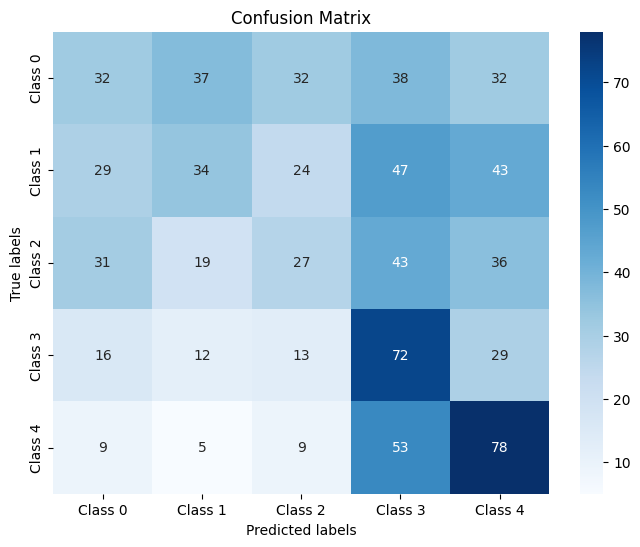

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_Y_labels, pred_Y_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()